In [159]:
pip install pandas numpy scipy matplotlib seaborn jupyter

Note: you may need to restart the kernel to use updated packages.


In [160]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.


In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pulp 

<AxesSubplot:xlabel='Jobs Committed', ylabel='Count'>

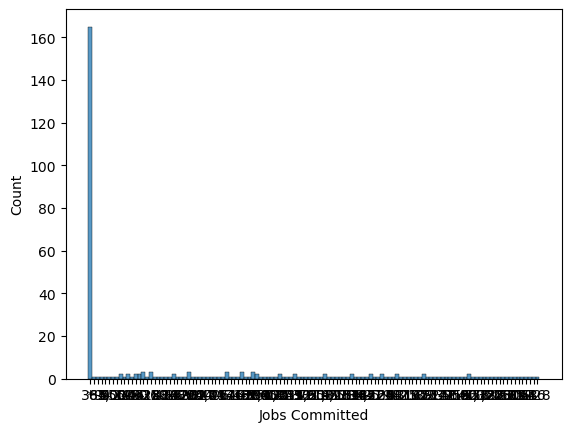

In [162]:
# Simple EDA - visualize the distribution of jobs committed
df = pd.read_csv('Hydropower_Allocations.csv')
sns.histplot(df['Jobs Committed'])
# Check for correlation between allocations and jobs committed


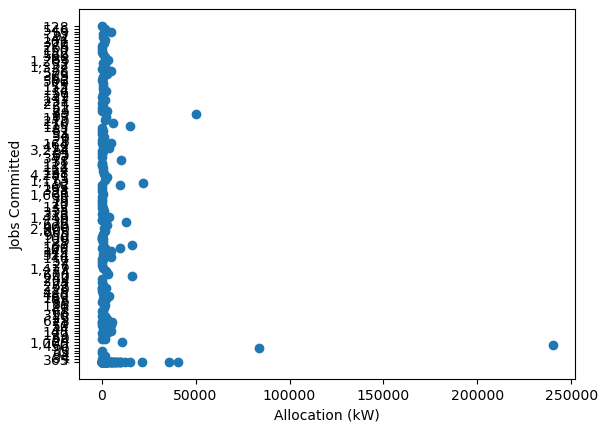

In [163]:
# Check for correlation between allocations and jobs committed
plt.scatter(df['Allocation (kW)'], df['Jobs Committed'])
plt.xlabel('Allocation (kW)')
plt.ylabel('Jobs Committed')
plt.show()

In [164]:
# Assuming 'Customer' is the column with customer names
customers = df['Customer'].unique().tolist()

# Hypothetical example where each kW of power is assumed to create 0.05 jobs
# This is a simplification and should ideally be based on an analysis of historical data

jobs_per_kw = 0.05

# If you want to sum up all the allocations for a customer if they have multiple rows
jobs_created = {customer: jobs_per_kw * df[df['Customer'] == customer]['Allocation (kW)'].sum() for customer in customers}

In [165]:


# Dictionary to store the jobs created per customer based on their allocation
jobs_created = {}

for customer in customers:
    # Sum up all allocations for the customer if there are multiple rows
    total_allocation = df.loc[df['Customer'] == customer, 'Allocation (kW)'].sum()
    jobs_created[customer] = jobs_per_kw * total_allocation


In [166]:
max_allocation = df.set_index('Customer')['Allocation (kW)'].to_dict()
min_allocation = {customer: 0.8 * max_allocation[customer] for customer in customers}

In [167]:
# Initialize the optimization problem
prob = pulp.LpProblem("Hydropower_Optimization", pulp.LpMaximize)

# Define decision variables
power_allocations = pulp.LpVariable.dicts("Allocation", customers, lowBound=0)

# Define objective function
prob += pulp.lpSum([jobs_created[customer] * power_allocations[customer] for customer in customers])

# Define constraints
for customer in customers:
    prob += power_allocations[customer] <= max_allocation[customer]
    prob += power_allocations[customer] >= min_allocation[customer]

# Solve the problem
prob.solve()



1

In [168]:
# Print the status of the optimization
print("Status:", pulp.LpStatus[prob.status])

# Print the optimized allocations
for customer in customers:
    print(f"Allocation for {customer}: {power_allocations[customer].varValue}")

# Analyze the results
# (Here you could calculate the total jobs created, the total power allocated, etc.)

Status: Optimal
Allocation for 3M Company: 5460.0
Allocation for ADM Milling Company: 1900.0
Allocation for Advance 2000, Inc.: 120.0
Allocation for Air Products and Chemicals, Inc.: 10000.0
Allocation for Alcoa (West): 240000.0
Allocation for Amazon.com Services LLC: 10660.0
Allocation for Amcor Rigid Packaging USA, LLC: 1750.0
Allocation for Americold Real Estate, L.P.: 830.0
Allocation for API Heat Transfer, Inc.: 100.0
Allocation for Arconic Inc.: 5000.0
Allocation for Ashland Advanced Materials LLC: 340.0
Allocation for Ashton Potter (USA) LTD: 340.0
Allocation for ATI Allvac: 300.0
Allocation for Aurubis Buffalo, Inc.: 2800.0
Allocation for BlackRock Niagara LLC: 200.0
Allocation for Brunner, Inc.: 640.0
Allocation for Buffalo Newspress Inc.: 200.0
Allocation for Buffalo Tungsten Incorporated: 800.0
Allocation for Cascades Holding US Inc.: 7000.0
Allocation for CCL Label Inc.: 250.0
Allocation for CertainTeed Corporation: 2400.0
Allocation for Chocolate Delivery Systems, Inc.: 42

In [169]:
# Create a dictionary for current allocations where keys are customer names and values are their current power allocations
current_data = pd.Series(df['Allocation (kW)'].values, index=df['Customer']).to_dict()


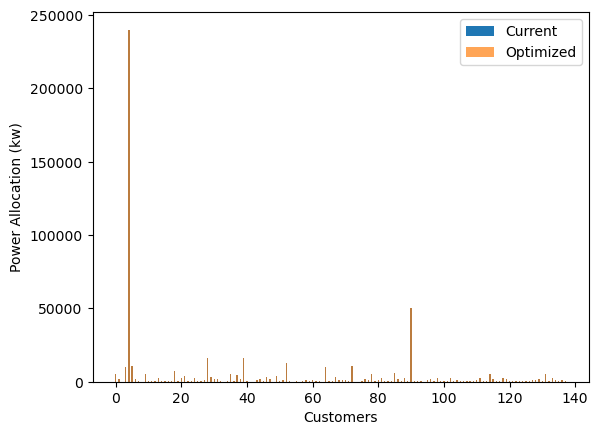

In [170]:

# Example: Compare current and optimized allocations
current_allocations = [current_data[customer] for customer in customers]
optimized_allocations = [power_allocations[customer].varValue for customer in customers]

index = range(len(customers))
plt.bar(index, current_allocations, width=0.4, label='Current')
plt.bar(index, optimized_allocations, width=0.4, label='Optimized', alpha=0.7)
plt.xlabel('Customers')
plt.ylabel('Power Allocation (kw)')
plt.legend()
plt.show()

In [171]:
#Adding  a machine learning model using decision trees. Decision trees and versatile an interpretable ml model

In [172]:
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

In [173]:
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = pd.to_numeric(X[col], errors='coerce')
        except ValueError as e:
            print(f"Column {col} contains non-numeric values")

In [174]:
# Check for NaN values in X and y after conversion
print("NaN values in X:")
print(X.isna().sum())

print("NaN values in y:")
print(y.isna().sum())


NaN values in X:
Program            310
City               310
County             310
Region             310
Allocation (kW)      0
Date               310
dtype: int64
NaN values in y:
0


In [175]:
# Check for infinity values in X
print("Infinity values in X:")
print(X[X == float('inf')].sum())

Infinity values in X:
Program            0.0
City               0.0
County             0.0
Region             0.0
Allocation (kW)    0.0
Date               0.0
dtype: float64


In [176]:
# Data cleaning: Remove rows containing infinity values
X = X[~X.isin([float('inf')]).any(axis=1)]
y = y[~y.isin([float('inf')])]

In [177]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\Maker\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
c:\Users\Maker\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [178]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the errors
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 16882.638719061935
Root Mean Squared Error: 129.9332086845466
Mean Absolute Error: 69.51952706791417


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the model
dtree = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4}


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
# Evaluate the best model from grid search
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 16078.872076033716
Root Mean Squared Error: 126.80249238888689
Mean Absolute Error: 71.29446073639622


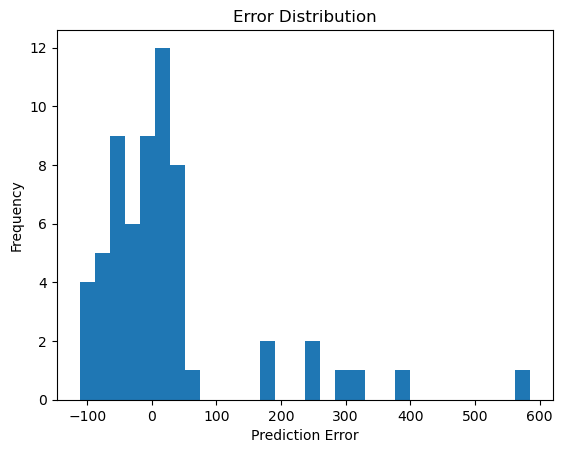

In [ ]:
# Plotting the error distribution
plt.hist(y_test - y_pred, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Trying RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate RandomForestRegressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")


Random Forest MSE: 16123.932905813443


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation with 5 folds
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("CV Average Score: ", np.mean(cv_scores))


CV Average Score:  -0.32450836937040994


In [ ]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'best_model.joblib')


['best_model.joblib']

Creating the dashboard 

In [ ]:
pip install dash


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load your dataset
df = pd.read_csv('Hydropower_Allocations.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Graph(id='scatter-plot'),
    html.P("Select Allocation (kW):"),
    dcc.Slider(
        id='allocation-slider',
        min=df['Allocation (kW)'].min(),
        max=df['Allocation (kW)'].max(),
        value=df['Allocation (kW)'].min(),
        marks={i: str(i) for i in range(int(df['Allocation (kW)'].min()), int(df['Allocation (kW)'].max())+1)},
        step=1
    ),
    html.Div(id='prediction-output')
])

# Simplified callback for updating the graph
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('allocation-slider', 'value')]
)
def update_graph(selected_allocation):
    # Simplified plot
    fig = px.scatter(x=[1, 2, 3], y=[1, 2, 3])
    return fig

# Simplified callback for the machine learning model prediction
@app.callback(
    Output('prediction-output', 'children'),
    [Input('allocation-slider', 'value')]
)
def update_prediction(selected_allocation):
    # Simplified text output
    return f'Selected Allocation: {selected_allocation}'

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
